# Lab 0: Using Arc GIS Online to Perform an Identical Buffer Analysis as ArcPro GUI

## Introduction

The purpose of this notebook is to use ArcGIS Online Jupyter Notebook to perform an identical buffer function as  Arc Pro GUI. First I will import the necessary packages and data. Then, I will visualize the data using "gis.map". Fianlly, I will run the "create buffer" tool and view the results. 

## Getting Started

First, I will import arcgis.gis and set my credentials. Then, I used at "add" from the panel to add the feature layer collection.   

## Welcome to your notebook.


#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

/opt/conda/lib/python3.6/site-packages/arcgis/gis/__init__.py:407: UserWarning: You are logged on as rosen656_UMN with an administrator role, proceed with caution.
  self.users.me.username)


#### Now you are ready to start!

<Item title:"Lab0_Webmap_WFL1" type:Feature Layer Collection owner:rosen656_UMN>
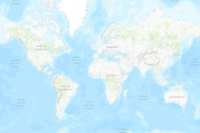

In [3]:
# Item Added From Toolbar
# Title: Lab0_Webmap_WFL1 | Type: Feature Service | Owner: rosen656_UMN
item = gis.content.get("c8acecc102654416a4345b478777146c")
item

In [8]:
item.layers ## viewing the laters 

[<FeatureLayer url:"https://services.arcgis.com/8df8p0NlLFEShl0r/arcgis/rest/services/Lab0_Webmap_WFL1/FeatureServer/0">,
 <FeatureLayer url:"https://services.arcgis.com/8df8p0NlLFEShl0r/arcgis/rest/services/Lab0_Webmap_WFL1/FeatureServer/1">,
 <FeatureLayer url:"https://services.arcgis.com/8df8p0NlLFEShl0r/arcgis/rest/services/Lab0_Webmap_WFL1/FeatureServer/2">]

## Visualizing Data 

The next few cells will show a topographic map with the original SNA Layer.

In [4]:
MN_Map = gis.map('Minnesota') ##showing a map of Minnesota

MN_Map

MapView(layout=Layout(height='400px', width='100%'))

In [15]:
MN_Map.add_layer(item.layers[2]) ## had to go to content to see which layer is the original layer I want. In this case, it is the third (second?) layer. 

MN_Map ##Now it will show the original layer

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

In [16]:
MNSNA = item.layers[2] ## creating a variable for the original layer 

In [17]:
MNSNA ##making sure it worked.

<FeatureLayer url:"https://services.arcgis.com/8df8p0NlLFEShl0r/arcgis/rest/services/Lab0_Webmap_WFL1/FeatureServer/2">

## Performing a Buffer Analysis and Visualizing the Result.

The next cells will show a 5 mile buffer analysis around the SNAs. Then it will be retrieved and visualized.

### A note on Create_Buffer.

"Create Buffer" in AGOL is not the same as "Buffer_Analysis" in Arcpy and Pro. I had to look up the documentation to figure out how to use it.

In [27]:
from arcgis import features
features.use_proximity.create_buffers(MNSNA, distances = [5], units = 'Miles', output_name = "SNABuff_AGOL") ## Input Data, Distance, Units, and Output name.

## The output is a feature layer collection that can be found in Content

<Item title:"SNABuff_AGOL" type:Feature Layer Collection owner:rosen656_UMN>

In [2]:
# Item Added From Toolbar
# Title: SNABuff_AGOL | Type: Feature Service | Owner: rosen656_UMN
output = gis.content.get("db4fe681a71f48f2a61920442fbc2cf4") ## Creating a variable to retrieve the new data.
output

<Item title:"SNABuff_AGOL" type:Feature Layer Collection owner:rosen656_UMN>

In [3]:
output.layers ## viewing the layers. Since there is only one layer, I don't need to find it. 

[<FeatureLayer url:"https://services.arcgis.com/8df8p0NlLFEShl0r/arcgis/rest/services/SNABuff_AGOL/FeatureServer/0">]

In [6]:
MN_Map.add_layer(output.layers[0]) ##Visualizing the output.

MN_Map

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

Success! The output shows a five mile radius around all the SNAs. This concludes the notebook.